<a href="https://colab.research.google.com/github/als1379/Movies-Analysis/blob/main/MovieAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


# Dataset

## Download Dataset

In [4]:
# Download latest version
path = kagglehub.dataset_download("rounakbanik/the-movies-dataset")

print("Path to dataset files:", path)

100%|██████████| 228M/228M [00:09<00:00, 25.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/rounakbanik/the-movies-dataset/versions/7


In [5]:
movie_dataset = pd.read_csv(path + '/movies_metadata.csv', low_memory=False)

In [6]:
movie_dataset

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


## Describe Each Column

In [7]:
for col in movie_dataset.columns:
  print(f"Value counts for column '{col}':")
  print(movie_dataset[col].value_counts())
  print("-" * 20)

Value counts for column 'adult':
adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64
--------------------
Value counts for column 'belongs_to_collection':
belongs_to_collection
{'id': 415931, 'name': 'The Bowery Boys', 'poster_path': '/q6sA4bzMT9cK7EEmXYwt7PNrL5h.jpg', 'backdrop_path': '/foe3kuiJmg5AklhtD3skWbaTMf2.jpg'}                 2

## Drop Unuseful Columns

In [8]:
movie_dataset = movie_dataset.drop('adult', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('belongs_to_collection', axis=1) # No Information
movie_dataset = movie_dataset.drop('homepage', axis=1) # No Information
movie_dataset = movie_dataset.drop('id', axis=1) # No Information
movie_dataset = movie_dataset.drop('imdb_id', axis=1) # No Information
movie_dataset = movie_dataset.drop('original_title', axis=1) # No Information
movie_dataset = movie_dataset.drop('overview', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('poster_path', axis=1) # No Information
movie_dataset = movie_dataset.drop('production_countries', axis=1) # Too Complicated
movie_dataset = movie_dataset.drop('tagline', axis=1) # Not Useful for this task
movie_dataset = movie_dataset.drop('video', axis=1) # unbalance ( 99% is False )
movie_dataset = movie_dataset.drop('spoken_languages', axis=1) # we keep original language
movie_dataset = movie_dataset.drop('revenue', axis=1) # No Information ( 99% is zero )

print(movie_dataset.columns)

Index(['budget', 'genres', 'original_language', 'popularity',
       'production_companies', 'release_date', 'runtime', 'status', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


## Transform Other Columns

### Transform budget column from numerical to known and unknown

In [9]:
movie_dataset['budget']

,budget
0,30000000
1,65000000
2,0
3,16000000
4,0
...,...
45461,0
45462,0
45463,0
45464,0


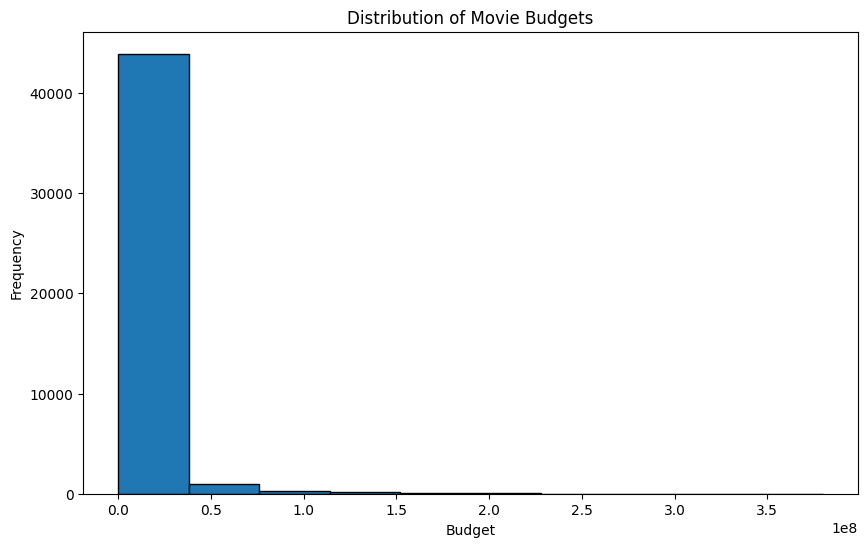

In [10]:
movie_dataset['budget'] = pd.to_numeric(movie_dataset['budget'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=10, edgecolor='black')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets')
plt.show()

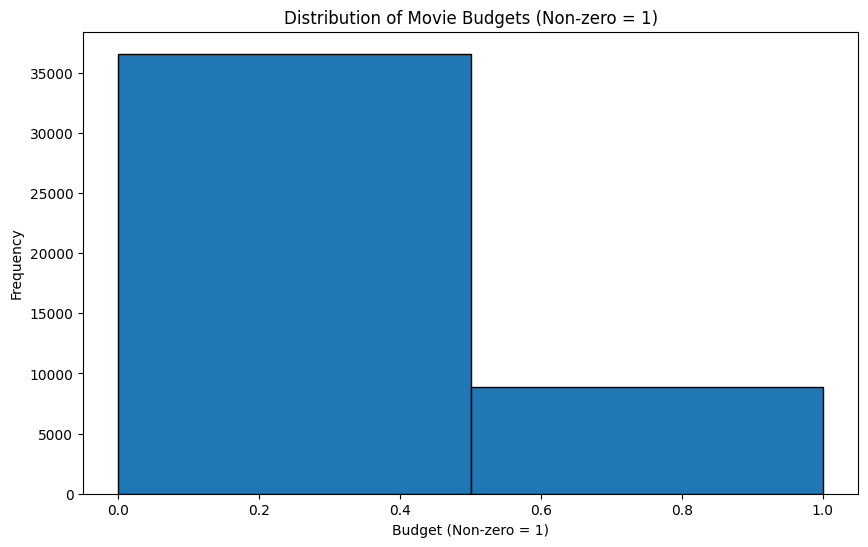

In [11]:
# Convert non-zero budget values to 1
movie_dataset['budget'] = movie_dataset['budget'].apply(lambda x: 1 if pd.notna(x) and x != 0 else x)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['budget'], bins=2, edgecolor='black')
plt.xlabel('Budget (Non-zero = 1)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budgets (Non-zero = 1)')
plt.show()

### Keeping only first genre and Encoding

In [12]:
movie_dataset['genres']

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"
...,...
45461,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n..."
45462,"[{'id': 18, 'name': 'Drama'}]"
45463,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
45464,[]


In [13]:
# prompt: genres column is a list of json keep only the 'name' value of first element and print value counts

import ast

def get_first_genre_name(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        if isinstance(genres_list, list) and genres_list and isinstance(genres_list[0], dict) and 'name' in genres_list[0]:
            return genres_list[0]['name']
    except (ValueError, SyntaxError, IndexError):
        pass  # Handle cases where genres_str is not a valid list of dictionaries
    return None  # Return None if extraction fails

# Apply the function to the 'genres' column
movie_dataset['genres'] = movie_dataset['genres'].apply(get_first_genre_name)

# Print value counts
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
None                     2442
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


In [14]:
# Drop rows with None values in the 'genres' column
movie_dataset = movie_dataset.dropna(subset=['genres'])

# Print value counts after dropping rows with None values
print(movie_dataset['genres'].value_counts(dropna=False))

genres
Drama                   11966
Comedy                   8820
Action                   4489
Documentary              3415
Horror                   2619
Crime                    1685
Thriller                 1665
Adventure                1514
Romance                  1191
Animation                1124
Fantasy                   704
Science Fiction           647
Mystery                   554
Family                    524
Music                     487
Western                   451
TV Movie                  390
War                       379
History                   279
Foreign                   118
Carousel Productions        1
Aniplex                     1
Odyssey Media               1
Name: count, dtype: int64


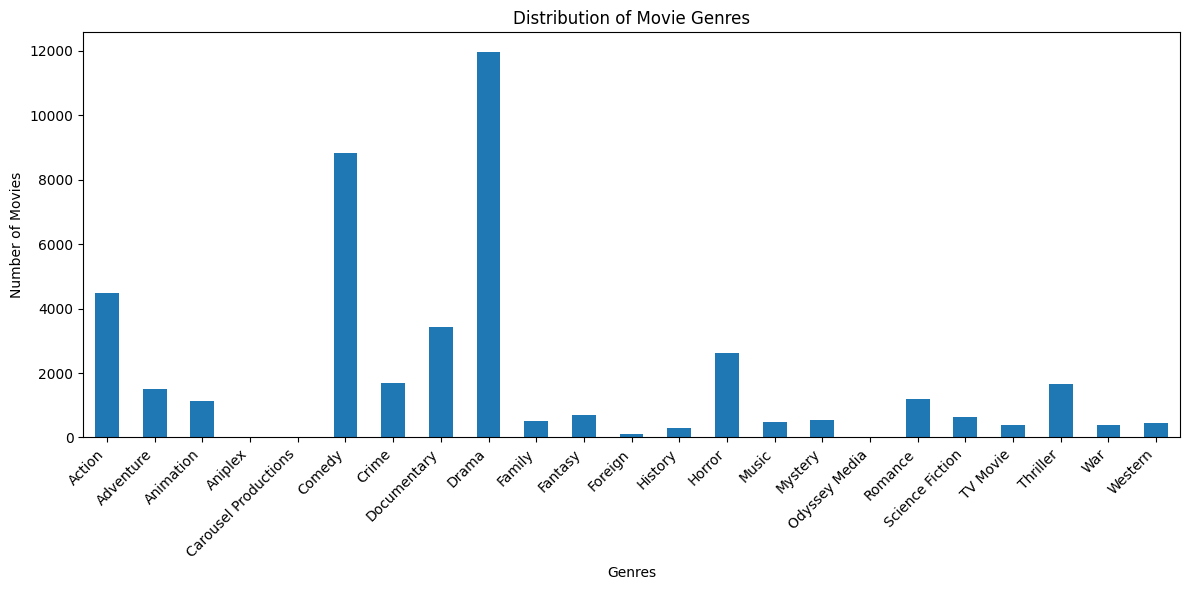

In [15]:
genre_counts = movie_dataset['genres'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

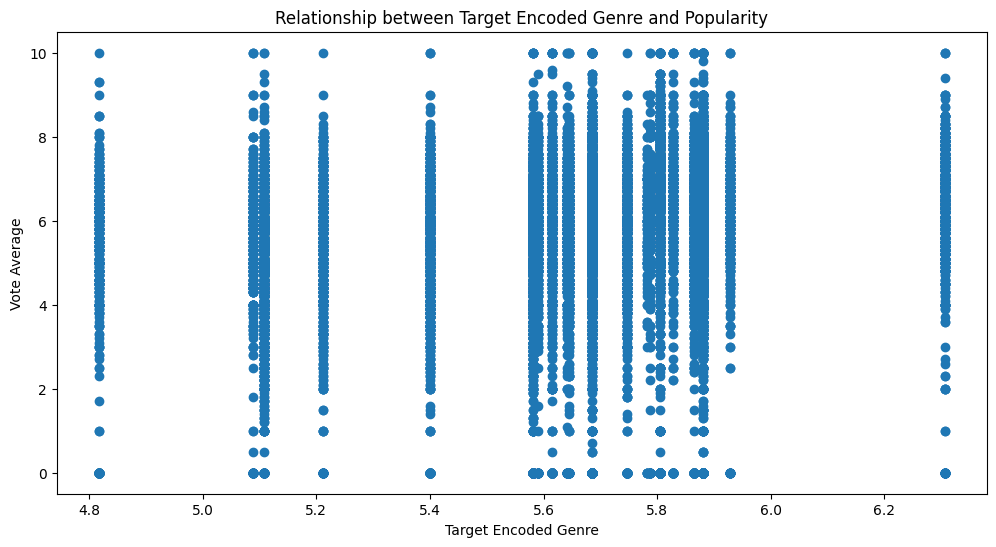

In [16]:
# Target Encoding
def target_encode_genres(df, target_column='vote_average'):
    # Calculate the mean popularity for each genre
    genre_popularity = df.groupby('genres')[target_column].mean()

    # Create a new column with the target encoded values
    df['genres'] = df['genres'].map(genre_popularity)

    return df, genre_popularity

movie_dataset, genre_popularity = target_encode_genres(movie_dataset)

# Example: Visualize the relationship between target encoded genre and popularity
plt.figure(figsize=(12, 6))
plt.scatter(movie_dataset['genres'], movie_dataset['vote_average'])
plt.xlabel('Target Encoded Genre')
plt.ylabel('Vote Average')
plt.title('Relationship between Target Encoded Genre and Popularity')
plt.show()

In [17]:
genre_popularity

,vote_average
genres,
Action,5.580816
Adventure,5.745971
Animation,6.305877
Aniplex,NaN
Carousel Productions,NaN
Comedy,5.686043
Crime,5.864926
Documentary,5.805388
Drama,5.881155


### Change type of release date keep year



In [18]:
# Convert 'release_date' to datetime objects, handling errors
movie_dataset['release_date'] = pd.to_datetime(movie_dataset['release_date'], errors='coerce')

# Extract the year and convert it to float
movie_dataset['release_year'] = movie_dataset['release_date'].dt.year.astype(float)

# Drop the original 'release_date' column
movie_dataset = movie_dataset.drop('release_date', axis=1)

### Convert original language to English and Non-English

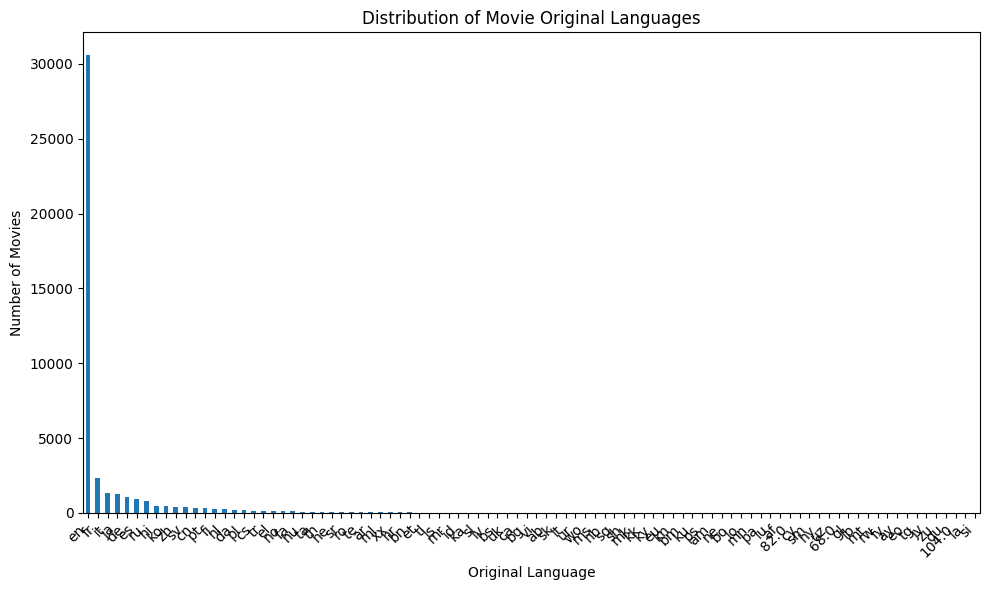

In [19]:
# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

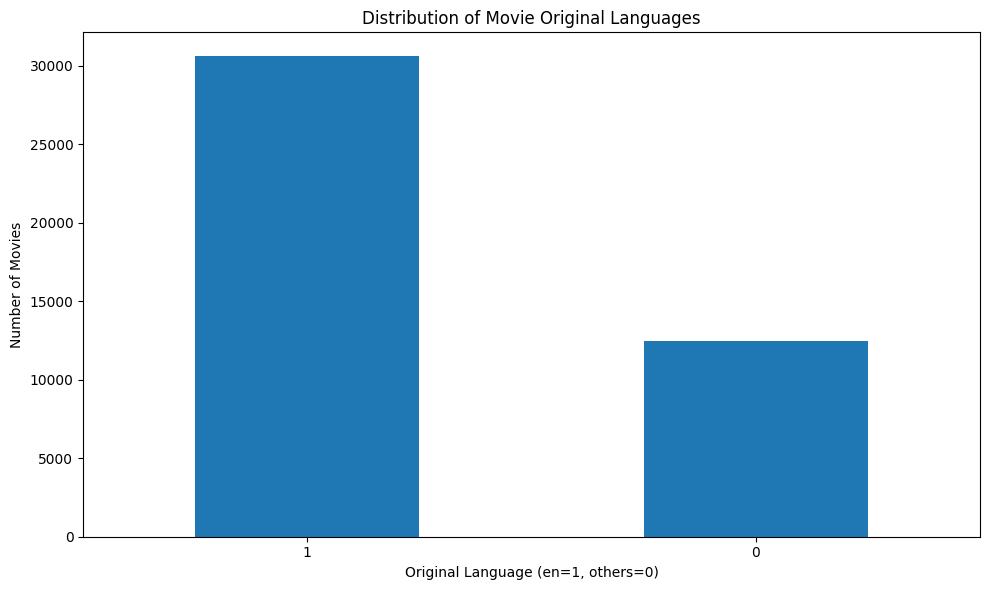

In [20]:
# Convert 'original_language' to 1 if 'en', otherwise 0
movie_dataset['original_language'] = movie_dataset['original_language'].apply(lambda x: 1 if x == 'en' else 0)

# Create the histogram
plt.figure(figsize=(10, 6))
movie_dataset['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language (en=1, others=0)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Original Languages')
plt.xticks(rotation=0)  # No rotation for better readability with 0 and 1
plt.tight_layout()
plt.show()

### Only keep released movies

In [21]:
movie_dataset = movie_dataset[movie_dataset['status'] == 'Released']
movie_dataset['status'].value_counts()

,count
status,
Released,42630


In [22]:
movie_dataset = movie_dataset.drop('status', axis=1)

### Transform production company to knwon and unknown

In [23]:
def process_production_companies(companies_str):
    try:
        companies_list = ast.literal_eval(companies_str)
        return 1 if len(companies_list) > 0 else 0
    except (ValueError, SyntaxError):
        return 0

movie_dataset['production_companies'] = movie_dataset['production_companies'].apply(process_production_companies)

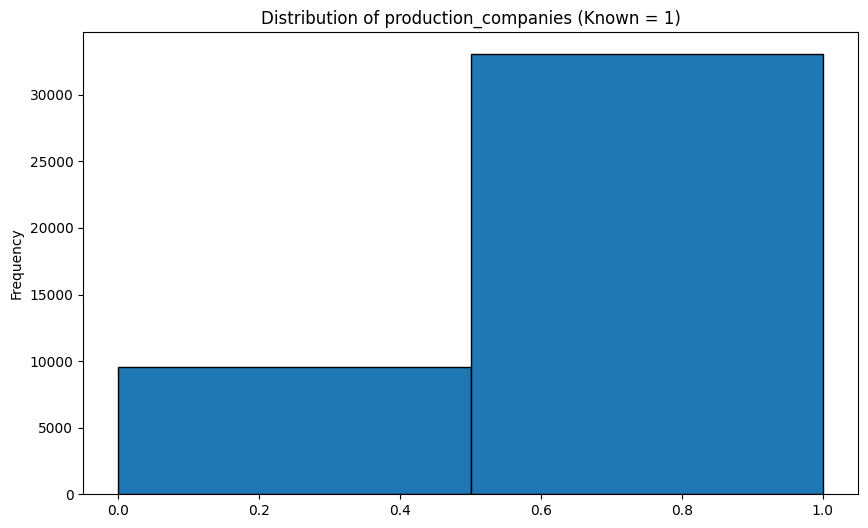

In [24]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_dataset['production_companies'], bins=2, edgecolor='black')
plt.ylabel('Frequency')
plt.title('Distribution of production_companies (Known = 1)')
plt.show()

In [25]:
movie_dataset = movie_dataset.dropna()

### Descretize continous columns

In [26]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal')
movie_dataset[['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']] = discretizer.fit_transform(
    movie_dataset[['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year']]
)


### Clean Dataset


In [27]:
movie_dataset

,budget,genres,original_language,popularity,production_companies,runtime,title,vote_average,vote_count,release_year
0,1.0,6.305877,1,2.0,1,0.0,Toy Story,2.0,2.0,1.0
1,1.0,5.745971,1,2.0,1,2.0,Jumanji,2.0,2.0,1.0
2,0.0,5.615449,1,2.0,1,1.0,Grumpier Old Men,2.0,2.0,1.0
3,1.0,5.686043,1,2.0,1,2.0,Waiting to Exhale,1.0,2.0,1.0
4,0.0,5.686043,1,2.0,1,2.0,Father of the Bride Part II,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
45458,0.0,5.107980,1,0.0,1,0.0,The Burkittsville 7,2.0,0.0,1.0
45459,0.0,5.211437,1,0.0,1,0.0,Caged Heat 3000,0.0,0.0,1.0
45460,0.0,5.881155,1,2.0,1,2.0,Robin Hood,1.0,2.0,1.0
45462,0.0,5.881155,0,0.0,1,2.0,Century of Birthing,2.0,0.0,2.0


### Preprocessing Summery
1. **Column Removal:**  Drops several columns deemed unhelpful for the intended analysis or exhibiting high imbalance (e.g., 'adult', 'belongs_to_collection', 'homepage').  Columns like 'id', 'imdb_id', 'original_title', 'overview', 'poster_path', and others are also removed.  This significantly reduces the dimensionality of the dataset.

2. **Data Transformation:**

   * **Budget:** Converts the 'budget' column to numerical values, then transforms it into a binary feature (1 if the budget is non-zero, otherwise the original value remains). This simplifies the budget representation.
   * **Genres:** Extracts the first genre from a list of genres associated with each movie. Handles cases where the genre information is not in the expected format. Then, it applies target encoding to the 'genres' column, replacing genre names with the average 'vote_average' for that genre.  This converts categorical genre data into numerical data that reflects popularity. Movies with no genre information are dropped.
   * **Release Date:** Only keep the year and change its type tp float.
   * **Original Language:** Converts the 'original_language' column to a binary feature (1 for English, 0 otherwise).
   * **Status:** Filters the dataset to include only movies with the 'Released' status, then removes the status column.
   * **Production Companies:**  Transforms the 'production_companies' column into a binary representation (1 if there's at least one production company listed, 0 otherwise).
3. **Descretize Continuous Columns:**  For more covinient use of the continuous columns we descritize them into 3 bins ['popularity', 'vote_average', 'vote_count', 'runtime', 'release_year'].



In essence, the preprocessing aims to clean the data by removing irrelevant or noisy features, convert categorical features into numerical ones (either binary or target-encoded), and prepare the dataset for further analysis or modeling.  The visualizations help to assess the effect of these transformations on the data distributions.


# Model

In [28]:
! pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [29]:
! sudo apt-get install graphviz graphviz-dev
! pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libgraphviz-dev' instead of 'graphviz-dev'
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://a

## Manual Models

In [30]:
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BicScore, K2Score, MaximumLikelihoodEstimator, ParameterEstimator, HillClimbSearch
from PIL import Image

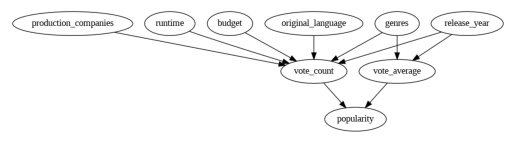

In [31]:
# Define Bayesian Network structure
manual_model_1 = BayesianNetwork([
    ('budget', 'vote_count'),
    ('genres', 'vote_average'),
    ('genres', 'vote_count'),
    ('original_language', 'vote_count'),
    ('production_companies', 'vote_count'),
    ('release_year', 'vote_count'),
    ('release_year', 'vote_average'),
    ('vote_count', 'popularity'),
    ('vote_average', 'popularity'),
    ('runtime', 'vote_count')
])

# Fit the model
manual_model_1.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

model_graphviz = manual_model_1.to_graphviz()

# Plot the model.
model_graphviz.draw("network_manual_model_1.png", prog="dot")


# Open the image
img = Image.open("network_manual_model_1.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

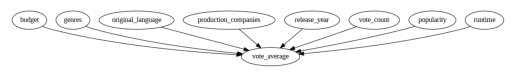

In [32]:
manual_model_2 = BayesianNetwork([
    ('budget', 'vote_average'),
    ('genres', 'vote_average'),
    ('original_language', 'vote_average'),
    ('production_companies', 'vote_average'),
    ('release_year', 'vote_average'),
    ('vote_count', 'vote_average'),
    ('popularity', 'vote_average'),
    ('runtime', 'vote_average')
])

# Fit the model
manual_model_2.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

# Perform inference
inference_manual_model_2 = VariableElimination(manual_model_2)

model_graphviz = manual_model_2.to_graphviz()

# Plot the model.
model_graphviz.draw("network_manual_model_2.png", prog="dot")

# Open the image
img = Image.open("network_manual_model_2.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

## Hill Climb Search Algorithm Model

  0%|          | 0/1000000 [00:00<?, ?it/s]

Learned Network Structure:
[('budget', 'runtime'), ('genres', 'vote_average'), ('original_language', 'popularity'), ('original_language', 'runtime'), ('original_language', 'budget'), ('original_language', 'release_year'), ('original_language', 'vote_average'), ('original_language', 'production_companies'), ('popularity', 'vote_count'), ('popularity', 'runtime'), ('popularity', 'genres'), ('production_companies', 'popularity'), ('production_companies', 'release_year'), ('production_companies', 'vote_count'), ('production_companies', 'budget'), ('runtime', 'genres'), ('vote_count', 'budget'), ('vote_count', 'vote_average'), ('release_year', 'popularity'), ('release_year', 'budget'), ('release_year', 'runtime'), ('release_year', 'vote_count')]


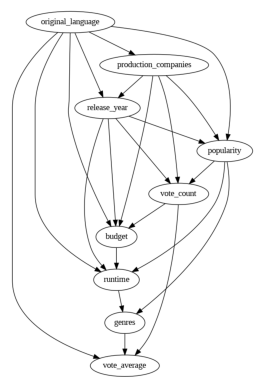

In [33]:
df = movie_dataset.sample(34000, random_state=42)
# Learn the structure using Hill Climbing and BIC scoring
hc = HillClimbSearch(df)
best_model = hc.estimate(scoring_method=BicScore(df))

# Print the learned structure
print("Learned Network Structure:")
print(best_model.edges())

# Define the Bayesian Network using the learned structure
hill_climb_model = BayesianNetwork(best_model.edges())
# inference_hill_climb_model = VariableElimination(hill_climb_model)
hill_climb_model.fit(movie_dataset, estimator=MaximumLikelihoodEstimator)

model_graphviz = hill_climb_model.to_graphviz()

# Plot the model.
model_graphviz.draw("network_hill_climb_model.png", prog="dot")

# Open the image
img = Image.open("network_hill_climb_model.png")

# Show the image using matplotlib
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()

# Evaluating Models

In [34]:
# Create scoring objects
bic = BicScore(movie_dataset)
k2 = K2Score(movie_dataset)

# Score your manual model 1
bic_score_manual = bic.score(manual_model_1)
k2_score_manual = k2.score(manual_model_1)

print("Manual 1 BN BIC Score:", bic_score_manual)
print("Manual 1 BN K2 Score:", k2_score_manual)

# Score your manual model 2
bic_score_manual = bic.score(manual_model_2)
k2_score_manual = k2.score(manual_model_2)

print("Manual 2 BN BIC Score:", bic_score_manual)
print("Manual 2 BN K2 Score:", k2_score_manual)

bic_score_hillclimb = bic.score(hill_climb_model)
k2_score_hillclimb = k2.score(hill_climb_model)

print("Hillclimb 2 BN BIC Score:", bic_score_hillclimb)
print("Hillclimb 2 BN K2 Score:", k2_score_hillclimb)

Manual 1 BN BIC Score: -386067.972946407
Manual 1 BN K2 Score: -372977.8190609792
Manual 2 BN BIC Score: -528399.6323502638
Manual 2 BN K2 Score: -392239.0603495628
Hillclimb 2 BN BIC Score: -362783.15854582505
Hillclimb 2 BN K2 Score: -361338.58792707993


In [35]:
def average_log_likelihood(bn_model, df):
    # Returns the average log-likelihood of df under bn_model
    est = MaximumLikelihoodEstimator(bn_model, df)
    log_likelihood = 0
    for index, row in df.iterrows():
        row_prob = 1.0
        for cpd in bn_model.get_cpds():
            variables = [cpd.variable] + list(cpd.variables[1:])  # variable + parents
            # Extract the relevant values from 'row'
            values = {var: row[var] for var in variables}
            # Probability of this instance for 'cpd.variable'
            p = cpd.get_value(**values)
            row_prob *= p
        if row_prob > 0:
            log_likelihood += np.log(row_prob)
        else:
            # If zero probability, the data point is impossible under the model
            # Could add a small epsilon or handle differently
            log_likelihood += -np.inf
    return log_likelihood / len(df)  # average per sample

# Example usage:
ll_manual_1 = average_log_likelihood(manual_model_1, movie_dataset)
ll_manual_2 = average_log_likelihood(manual_model_2, movie_dataset)
ll_hc = average_log_likelihood(hill_climb_model, movie_dataset)

print("Average Log-Likelihood (Manual Model 1):", ll_manual_1)
print("Average Log-Likelihood (Manual Model 2):", ll_manual_2)
print("Average Log-Likelihood (HillClimb Model):", ll_hc)


Average Log-Likelihood (Manual Model 1): -8.715681719213212
Average Log-Likelihood (Manual Model 2): -9.193862413770232
Average Log-Likelihood (HillClimb Model): -8.475072901094816


# Testing Models

In [36]:
model_names = ['manual_model_1', 'manual_model_2', 'hill_climb_model']

inferences = [
    VariableElimination(manual_model_1),
    VariableElimination(manual_model_2),
    VariableElimination(hill_climb_model)
]

## Qestion 1: Probability of high vote average given known production companies and budget

In vote average feature we have a categorical data with 3 bins. High, Medium, and low. Which are presented with 0, 1, and 2.

On the evidences we have production companies and budget which are binary features and 1 means known and 0 means unknown.

In [37]:
results = {}
for index, inference in enumerate(inferences):
    query = inference.query(variables=['vote_average'], evidence={'production_companies': 1, 'budget': 1})
    print(f"Results for {model_names[index]}:")
    print(query)
    results[model_names[index]]=tuple(query.values)

Results for manual_model_1:
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.3211 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3173 |
+-------------------+---------------------+
| vote_average(2.0) |              0.3616 |
+-------------------+---------------------+
Results for manual_model_2:
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=====================+
| vote_average(0.0) |              0.3386 |
+-------------------+---------------------+
| vote_average(1.0) |              0.3304 |
+-------------------+---------------------+
| vote_average(2.0) |              0.3310 |
+-------------------+---------------------+
Results for hill_climb_model:
+-------------------+---------------------+
| vote_average      |   phi(vote_average) |
+===================+=============

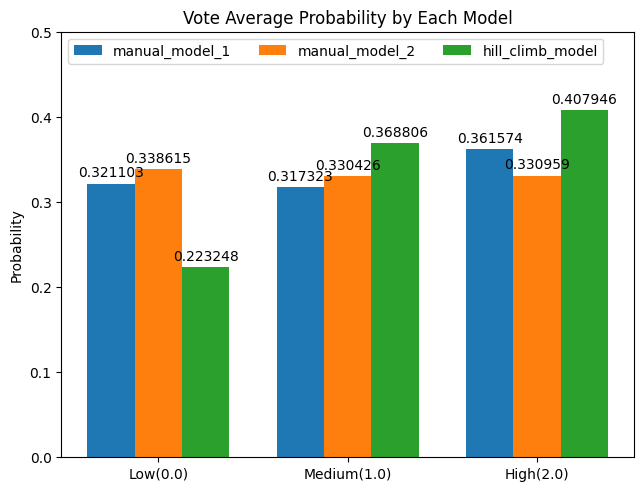

In [38]:
categories = ['Low(0.0)', 'Medium(1.0)', 'High(2.0)']

x = np.arange(3)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in results.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Vote Average Probability by Each Model')
ax.set_xticks(x + width, categories)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.5)

plt.show()

The Hill Climb model indicates that, for a movie produced by a known production company and with a known budget, a higher average vote is more likely—an outcome that aligns with common sense. By contrast, manual model 2 produces a nearly uniform distribution, while manual model 1 assigns the lowest probability to the medium vote average category.

## Question 2: Probability of hight vote average and high vote count given genres, known production company, and English original language.

A case might happen in a production company office.
There is English movie in specific genre should we invest on it or not?

We evaluate it by calculate of high vote average and high vote count which means successful movie.



In [39]:
results = {}
for genre in ['Action', 'Drama', 'Comedy', 'Fantasy']:
    results[genre] = {}
    for index, inference in enumerate(inferences):
        query = inference.query(variables=['vote_average', 'vote_count'], evidence={'original_language': 1, 'production_companies': 1, 'genres': genre_popularity[genre]})
        print(f"Results for {model_names[index]} with gener: {genre}:")
        print(query)
        results[genre][model_names[index]]=tuple(query.values)

Results for manual_model_1 with gener: Action:
+-------------------+-----------------+--------------------------------+
| vote_average      | vote_count      |   phi(vote_average,vote_count) |
+===================+=================+================================+
| vote_average(0.0) | vote_count(0.0) |                         0.0662 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(1.0) |                         0.1125 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(2.0) |                         0.1813 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(0.0) |                         0.0703 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(1.0) |                         0.1160 |
+-------------------+-----------------+--------------------------------+
| vo

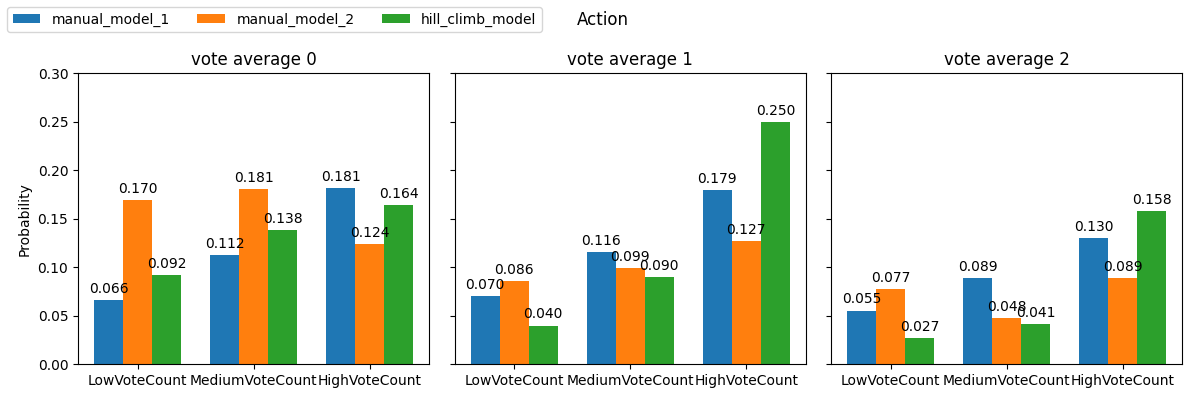

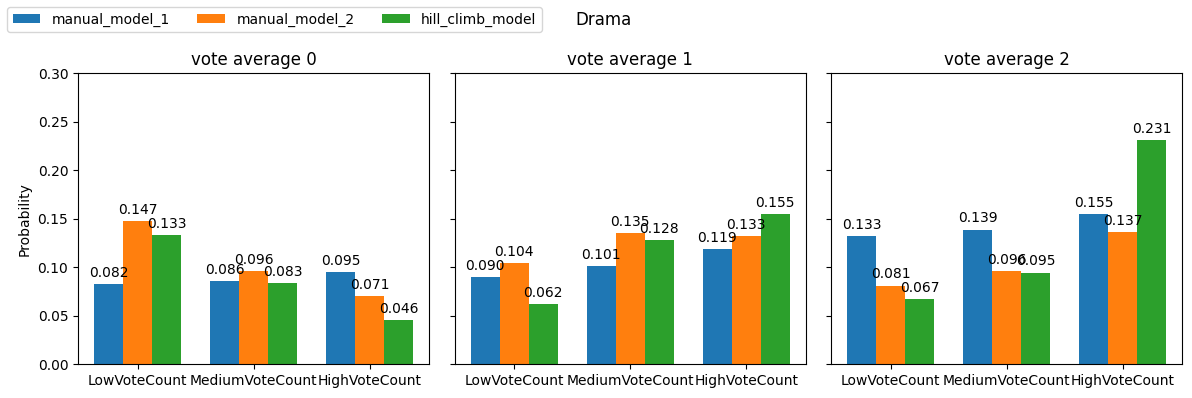

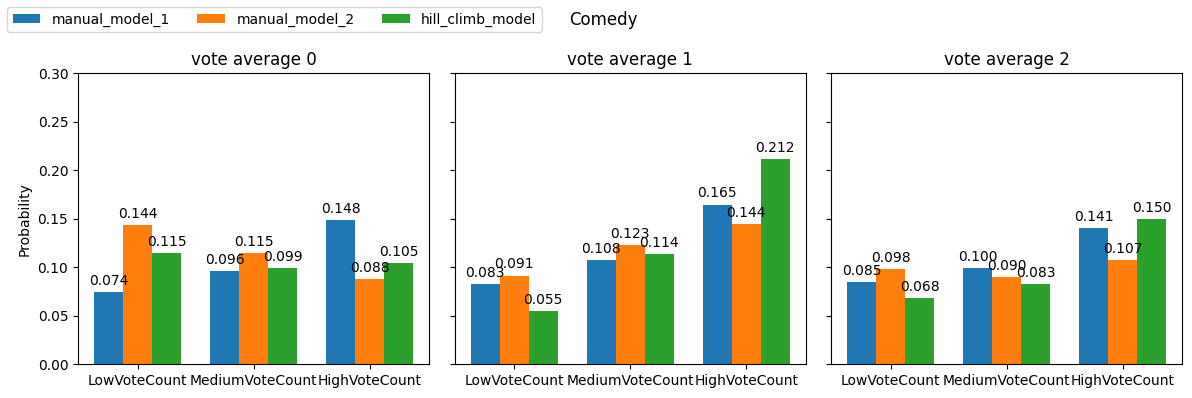

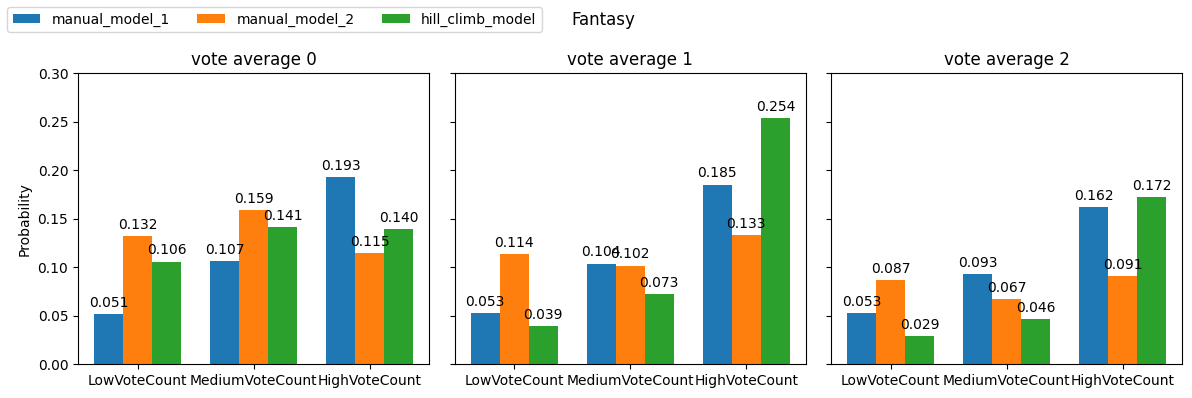

In [40]:
categories = ['LowVoteCount', 'MediumVoteCount', 'HighVoteCount']
model_colors = {
    'manual_model_1': '#1f77b4',  # or pick any colors you like
    'manual_model_2': '#ff7f0e',
    'hill_climb_model': '#2ca02c'
}

for genre, model_dict in results.items():
    # We'll make 3 subplots, one for each "condition/index" in the tuple
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

    for cond_idx in range(3):
        ax = axes[cond_idx]

        # We'll collect each model's distribution for this condition
        # e.g., for manual_model_1, we get model_dict['manual_model_1'][cond_idx]
        # which is a length-3 array: [p(Low), p(Medium), p(High)]
        x = np.arange(len(categories))  # [0,1,2] for the 3 categories
        bar_width = 0.25
        offset = 0

        # Plot each model's probabilities as its own bar group
        for i, (model_name, prob_tuple) in enumerate(model_dict.items()):
            prob_array = prob_tuple[cond_idx]  # e.g. [0.07, 0.11, 0.18]

            rects = ax.bar(x + offset, prob_array,
                           bar_width,
                           label=model_name if cond_idx == 0 else "",  # label once
                           color=model_colors.get(model_name, None))
            # Show numeric labels on top of bars
            ax.bar_label(rects, fmt="%.3f", padding=3)

            offset += bar_width

        ax.set_xticks(x + bar_width, categories)
        ax.set_ylim(0, 0.3)  # Adjust as needed
        ax.set_title(f'vote average {cond_idx}')
        if cond_idx == 0:
            ax.set_ylabel('Probability')

    fig.suptitle(f'{genre}')
    fig.legend(loc='upper left', ncol=3)  # Show model legend once per figure
    plt.tight_layout()
    plt.show()


As you can see based on Hillclimb model best probablity of hight vote_count and high vote_average is Drama with 23%. And the worst genre based on HC model is Comedy with 15%.
For the other models the probability of high vote count and average for all genres are more uniform and less than HC models value. For example the 23% for Drama is 15% for manual model 1 and 13% for manual model 2.


### More specific case is that we are a company and there is two movie we should decide to invest on which one.

First is Action and English and high runtime.
Second is Drama and Non-English and low runtime.


In [41]:
results = [{}, {}]

In [42]:
print('First Case:')
for index, inference in enumerate(inferences):
    query = inference.query(variables=['vote_average', 'vote_count'], evidence={'original_language': 1, 'runtime': 2, 'production_companies': 1, 'genres': genre_popularity['Action']})
    print(f"Results for {model_names[index]}:")
    print(query)
    results[0][model_names[index]]=tuple(query.values)

First Case:
Results for manual_model_1:
+-------------------+-----------------+--------------------------------+
| vote_average      | vote_count      |   phi(vote_average,vote_count) |
+===================+=================+================================+
| vote_average(0.0) | vote_count(0.0) |                         0.0422 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(1.0) |                         0.1053 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(2.0) |                         0.2125 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(0.0) |                         0.0448 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(1.0) |                         0.1090 |
+-------------------+-----------------+--------------------------------+
| vote_aver

In [43]:
print('Second Case:')
for index, inference in enumerate(inferences):
    query = inference.query(variables=['vote_average', 'vote_count'], evidence={'original_language': 0, 'runtime': 0, 'production_companies': 1, 'genres': genre_popularity['Drama']})
    print(f"sResults for {model_names[index]}:")
    print(query)
    results[1][model_names[index]]=tuple(query.values)

Second Case:
sResults for manual_model_1:
+-------------------+-----------------+--------------------------------+
| vote_average      | vote_count      |   phi(vote_average,vote_count) |
+===================+=================+================================+
| vote_average(0.0) | vote_count(0.0) |                         0.1113 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(1.0) |                         0.0911 |
+-------------------+-----------------+--------------------------------+
| vote_average(0.0) | vote_count(2.0) |                         0.0604 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(0.0) |                         0.1309 |
+-------------------+-----------------+--------------------------------+
| vote_average(1.0) | vote_count(1.0) |                         0.1092 |
+-------------------+-----------------+--------------------------------+
| vote_av

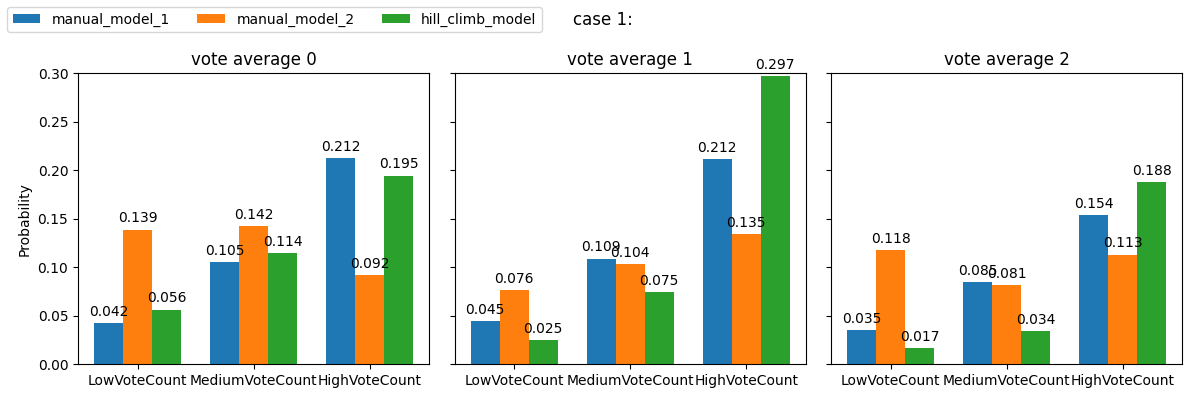

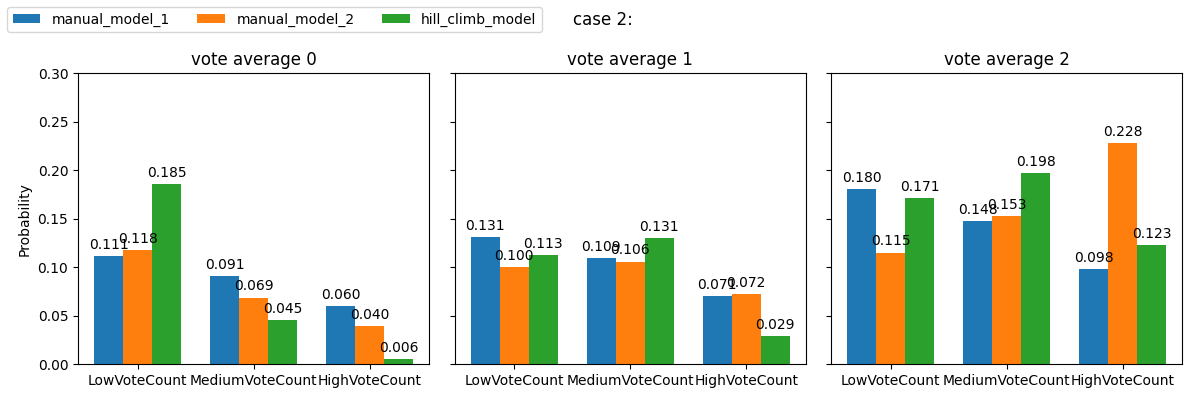

In [44]:
categories = ['LowVoteCount', 'MediumVoteCount', 'HighVoteCount']
model_colors = {
    'manual_model_1': '#1f77b4',  # or pick any colors you like
    'manual_model_2': '#ff7f0e',
    'hill_climb_model': '#2ca02c'
}

for j, result in enumerate(results):
    # We'll make 3 subplots, one for each "condition/index" in the tuple
    fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

    for cond_idx in range(3):
        ax = axes[cond_idx]

        # We'll collect each model's distribution for this condition
        # e.g., for manual_model_1, we get model_dict['manual_model_1'][cond_idx]
        # which is a length-3 array: [p(Low), p(Medium), p(High)]
        x = np.arange(len(categories))  # [0,1,2] for the 3 categories
        bar_width = 0.25
        offset = 0

        # Plot each model's probabilities as its own bar group
        for i, (model_name, prob_tuple) in enumerate(result.items()):
            prob_array = prob_tuple[cond_idx]  # e.g. [0.07, 0.11, 0.18]

            rects = ax.bar(x + offset, prob_array,
                           bar_width,
                           label=model_name if cond_idx == 0 else "",  # label once
                           color=model_colors.get(model_name, None))
            # Show numeric labels on top of bars
            ax.bar_label(rects, fmt="%.3f", padding=3)

            offset += bar_width

        ax.set_xticks(x + bar_width, categories)
        ax.set_ylim(0, 0.3)  # Adjust as needed
        ax.set_title(f'vote average {cond_idx}')
        if cond_idx == 0:
            ax.set_ylabel('Probability')

    fig.suptitle(f'case {j+1}:')
    fig.legend(loc='upper left', ncol=3)  # Show model legend once per figure
    plt.tight_layout()
    plt.show()


Based on HC model:
it is more probable to get high vote_count and medium or average vote_avrage for the first case. However it is more probable to get low vote_count and average_vote for the second case.
So if we work based on HC model we should invest on the first case.

# Question 3: Probability of popularity given production company and runtime and genre
This can be a real case for a movie director to decide to sign a contract with a production company or not based on the genre.
We will observe the impact of known and unknown production company on the popularity.

We give runtime = 0 (low)
and release year = 2 (New)

In [63]:
results_known_pc = {}
for genre in ['Action', 'Drama', 'Comedy']:
    results_known_pc[genre] = {}
    for index, inference in enumerate(inferences):
        query = inference.query(variables=['popularity'], evidence={'original_language': 0, 'production_companies': 1, 'genres': genre_popularity[genre]})
        print(f"Known production company results for {model_names[index]} with gener: {genre}:")
        print(query)
        results_known_pc[genre][model_names[index]]=tuple(query.values)

Known production company results for manual_model_1 with gener: Action:
+-----------------+-------------------+
| popularity      |   phi(popularity) |
+=================+===================+
| popularity(0.0) |            0.2259 |
+-----------------+-------------------+
| popularity(1.0) |            0.3487 |
+-----------------+-------------------+
| popularity(2.0) |            0.4253 |
+-----------------+-------------------+
Known production company results for manual_model_2 with gener: Action:
+-----------------+-------------------+
| popularity      |   phi(popularity) |
+=================+===================+
| popularity(0.0) |            0.3333 |
+-----------------+-------------------+
| popularity(1.0) |            0.3333 |
+-----------------+-------------------+
| popularity(2.0) |            0.3333 |
+-----------------+-------------------+
Known production company results for hill_climb_model with gener: Action:
+-----------------+-------------------+
| popularity      |   

In [66]:
results_unknown_pc = {}
for genre in ['Action', 'Drama', 'Comedy']:
    results_unknown_pc[genre] = {}
    for index, inference in enumerate(inferences):
        query = inference.query(variables=['popularity'], evidence={'original_language': 0, 'production_companies': 0, 'genres': genre_popularity[genre]})
        print(f"Unknown production company results for {model_names[index]} with gener: {genre}:")
        print(query)
        results_unknown_pc[genre][model_names[index]]=tuple(query.values)

Unknown production company results for manual_model_1 with gener: Action:
+-----------------+-------------------+
| popularity      |   phi(popularity) |
+=================+===================+
| popularity(0.0) |            0.3972 |
+-----------------+-------------------+
| popularity(1.0) |            0.4265 |
+-----------------+-------------------+
| popularity(2.0) |            0.1763 |
+-----------------+-------------------+
Unknown production company results for manual_model_2 with gener: Action:
+-----------------+-------------------+
| popularity      |   phi(popularity) |
+=================+===================+
| popularity(0.0) |            0.3333 |
+-----------------+-------------------+
| popularity(1.0) |            0.3333 |
+-----------------+-------------------+
| popularity(2.0) |            0.3333 |
+-----------------+-------------------+
Unknown production company results for hill_climb_model with gener: Action:
+-----------------+-------------------+
| popularity    

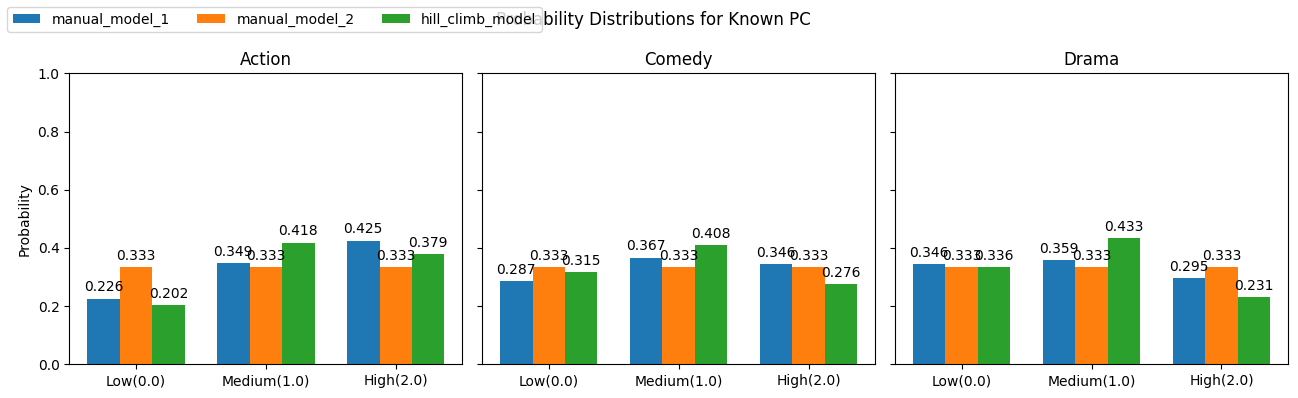

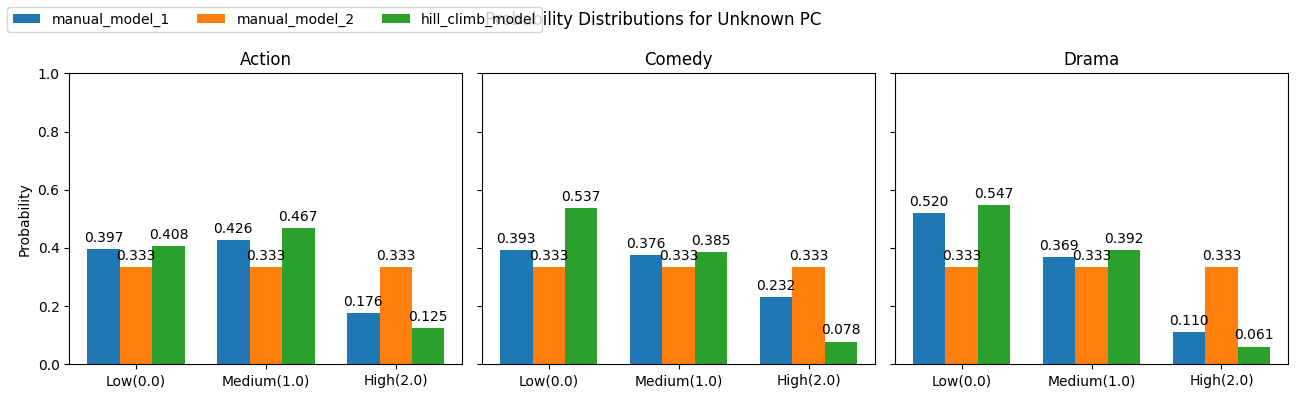

In [65]:
results = {'Known PC': results_known_pc, 'Unknown PC': results_unknown_pc}


# Categories on the x-axis (Low, Medium, High)
categories = ["Low(0.0)", "Medium(1.0)", "High(2.0)"]

# (Optional) Define fixed colors for each model
model_colors = {
    "manual_model_1": "#1f77b4",       # Blue
    "manual_model_2": "#ff7f0e",       # Orange
    "hill_climb_model": "#2ca02c"      # Green
}

# Iterate over the top-level keys: Known PC, Unknown PC
for pc_key, genres in results.items():
    fig, axes = plt.subplots(
        1, 3,  # One row, three columns (Action, Drama, Comedy)
        figsize=(13, 4),
        sharey=True
    )
    fig.suptitle(f"Probability Distributions for {pc_key}")

    # Sort genres so we always plot Action, Drama, Comedy in order
    # (If you want them in another order, just define a list and iterate.)
    genre_names = sorted(genres.keys())  # e.g., ["Action", "Comedy", "Drama"]

    for idx, genre in enumerate(genre_names):
        ax = axes[idx]

        # Retrieve the dictionary of model -> probabilities
        model_dict = genres[genre]

        # We'll create a grouped bar chart with 3 bars (one per model) at each
        # of the 3 category positions (Low, Medium, High).
        x = np.arange(len(categories))  # [0, 1, 2]
        bar_width = 0.25
        offset = 0

        for i, (model_name, probs) in enumerate(model_dict.items()):
            # 'probs' is a 3-element tuple for [Low, Medium, High]
            rects = ax.bar(
                x + offset,
                probs,
                bar_width,
                label=model_name if idx == 0 else "",  # Label only once for legend
                color=model_colors.get(model_name, None)  # or a fallback color
            )
            # Annotate each bar with probability (2 or 3 decimal places)
            ax.bar_label(rects, fmt="%.3f", padding=3)

            offset += bar_width

        ax.set_title(genre)
        ax.set_xticks(x + bar_width, categories)
        ax.set_ylim(0, 1.0)  # Probabilities can be up to 1; adjust if needed
        if idx == 0:
            ax.set_ylabel("Probability")

    # Create a single legend for all subplots in the figure
    # (If the legend overlaps the bars, try loc="upper left" or another position)
    fig.legend(loc="upper left", ncol=3)
    plt.tight_layout()
    plt.show()


As we can see it is essential for the director to sign a contract to a production company based on manual_1 and HC model

Model manual_2 is not reliable because there is no edge between popularity and production company and genre in the structure of network. Model manual_2 can only be reliable for queries with objective of vote_average.